<a href="https://colab.research.google.com/github/DantonCoote/My_RRC_HUB/blob/DeepLearning/Assign3_Group9_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 for Neural Networks and Deep Learning

## Step 1.1, Loading the Data

In this assignment we are using a public built in dataset from the Tensorflow/Keras library.<br>
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

In [1]:
import keras as ks


(features_train, label_train), (features_test, label_test) = ks.datasets.cifar10.load_data()

Well things have been loaded. Time to explore our dataset. <br>
There seems to be multiple ways to load this data, one of which doesn't load the set but instead generates it.

## Step 1.2, Data Exploration

In [2]:
# combining data into single dataframes for analysis
import numpy as np

labels_t = np.concatenate([label_train, label_test])
print(labels_t.shape)
len(labels_t)

(60000, 1)


60000

In [3]:
import pandas as pd
df_labels = pd.DataFrame(labels_t, columns=['Label'])

#counting our unique values and sorting them
df_labels_counts = df_labels['Label'].value_counts().sort_index()
df_labels_counts.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 0 to 9
Series name: count
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 90.0 bytes


<Axes: xlabel='Label'>

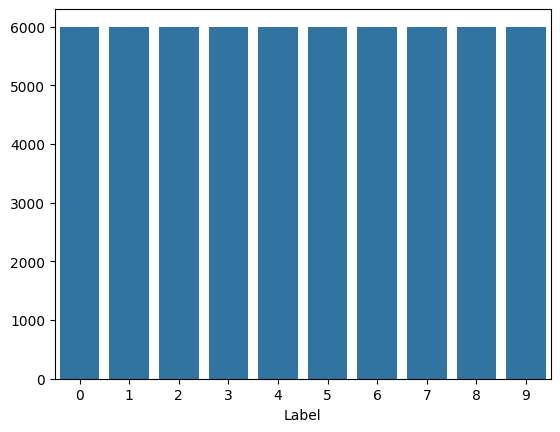

In [4]:
import seaborn as sb
sb.barplot(x=df_labels_counts.index, y=df_labels_counts.values)

Well we see a very even split of our data!

In [5]:
# Splitting our test data into validation and test sets
from sklearn.model_selection import train_test_split as tts

# actually testing our data
test_data, val_data, test_labels, val_labels = tts(features_test, label_test, train_size= 0.5)
print(len(val_data))
print(len(test_data))
print(len(val_labels))

5000
5000
5000


Simply splitting our test data evenly between a test and validation set<br><br>
Now I am going to attempt something a bit more extreme as I can build in data augmentation layers into my Neural Network. This is not something we have covered in class but it seems the newer Keras and Tensorflow libraries are more robust and allow for better information flow!


In [6]:
# Gathering our data to combine it into Tensorflow dataset variables
import tensorflow as tf

training_d = tf.data.Dataset.from_tensor_slices((features_train, label_train)).batch(10)
testing = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(10)
validation = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(10)

## Step 2.1, My Original Model

In [7]:
# Lets build our model's preprocessing layers first
from keras import Sequential # What our model will be built from

# this we are resizing all images to 32 by 32, and scaling the pixels down by
# a factor of 255
resize_and_rescale = tf.keras.Sequential([
  ks.layers.Resizing(32,32),
  ks.layers.Rescaling(1./255)
])
resize_and_rescale.trainable = False #Freezing this layer to prevent any
# weight from being rescaled

In [8]:
# here we add some layers to augment our data, mainly by adding
# variation and noise
data_augmentation = tf.keras.Sequential([
  ks.layers.RandomFlip("horizontal_and_vertical"),# Flips sections of image
  ks.layers.RandomRotation(0.2),# rotates pixels within a range randomly
  ks.layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
])# the last layer should shift images randomly, adding blank spaces
data_augmentation.trainable = False #Second verse same as the first

Do they work? I think so, we didn't get errors so that makes life easier. I am still figuring out all this new methodology at this time.

In [9]:
# Here we begin to build the actual Neural Network itself
my_model = Sequential([
    # adding our preprocessing layers
    resize_and_rescale,
    data_augmentation,

    # adding our first major layers
    ks.layers.Conv2D(32, (3,3), activation='relu',padding='valid'),
    # this layer puts everything into a 2D layer, combining it as a dot product
    # of 32 (the filter)
    ks.layers.MaxPooling2D((2,2)),
    # This layer compounds our data, reducing our features while preserving depth
    # making it more efficient and robust.

    # Our second feature extraction layer
    ks.layers.Conv2D(64, (3,3), activation='relu',padding='valid'),
    ks.layers.MaxPooling2D((2,2)),

    # Flatten the output from the convolutional layers
    # before connecting to the dense layers
    ks.layers.Flatten(),

    # our interconnected layers that do the actual learning and decision making
    ks.layers.Dense(256, activation='relu'),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

In [10]:
my_model.compile(optimizer='adam',
              loss=ks.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
history = my_model.fit(training_d, validation_data=validation, epochs=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 149s 28ms/step - accuracy: 0.2491 - loss: 1.9977 - val_accuracy: 0.3918 - val_loss: 1.6560
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 201s 28ms/step - accuracy: 0.3855 - loss: 1.6881 - val_accuracy: 0.4438 - val_loss: 1.5450
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 136s 27ms/step - accuracy: 0.4307 - loss: 1.5715 - val_accuracy: 0.4786 - val_loss: 1.4734
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 139s 28ms/step - accuracy: 0.4554 - loss: 1.5108 - val_accuracy: 0.4994 - val_loss: 1.4327
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 135s 27ms/step - accuracy: 0.4735 - loss: 1.4708 - val_accuracy: 0.5068 - val_loss: 1.4241
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 140s 27ms/step - accuracy: 0.4814 - loss: 1.4440 - val_accuracy: 0.5204 - val_loss: 1.3800
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 133s 27ms/step - accuracy: 0.4985 - loss: 1.4091 - val_accuracy: 0.5278 - val_loss: 1.3570
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 144s 27ms/step - accuracy: 

In [12]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,953,824 (7.45 MB)

 Trainable params: 651,274 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,302,550 (4.97 MB)

In [13]:
# Saving the model for future use as my god these things take forever to train
my_model.save('my_model.keras',overwrite=True)

Now we are testing our models results against a model designed by a proper professional. This is apart of the assignment as there are pre-trained public models that we have access to and this is to encourage us to explore how to use and adapt these pre-trained models.



## Step 2.2, Using a Pre-Trained Model

I have chosen to use the ResNet50V2 model for my training. Here goes nothing.

In [51]:
from keras.api.applications.resnet_v2 import preprocess_input
from keras.api.applications.resnet_v2 import ResNet50V2

#initializing the pretrained/predeveloped model
ResNet = ResNet50V2(include_top=False,
                   weights='imagenet',
                   input_shape=(32, 32, 3))
ResNet.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 8, 8, 64)       │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 8, 8, 64)       │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 10, 10, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [56]:
# Freezing all layers of the ResNet model
ResNet.trainable = False

In [57]:
# Adding a classification head
my_ResNet = ks.models.Sequential([
    ResNet, #the base model

    # our custom layers to adapt it's output
    ks.layers.GlobalAveragePooling2D(),
    ks.layers.Dense(512, activation='relu'),
    ks.layers.Dropout(0.5),
    ks.layers.Dense(10, activation='softmax')
])

This model is very large powerful from what I understand but it is very large and resource intensive which is not something I can really work with on a free Collab system.

In [58]:
my_ResNet.compile(optimizer='adam',
              loss=ks.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [59]:
# Preprocessing the data for our pretrained model
training_2 = preprocess_input(features_train)
validation_2 = preprocess_input(val_data)
training_2 = tf.data.Dataset.from_tensor_slices((training_2, label_train)).batch(10)
validation_2 = tf.data.Dataset.from_tensor_slices((validation_2, val_labels)).batch(10)

In [60]:
ResNet_history = my_ResNet.fit(training_2, epochs=10, validation_data=validation_2)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 449s 88ms/step - accuracy: 0.1177 - loss: 5.5198 - val_accuracy: 0.1280 - val_loss: 2.2740
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 407s 81ms/step - accuracy: 0.1281 - loss: 2.2719 - val_accuracy: 0.2062 - val_loss: 2.1496
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 449s 83ms/step - accuracy: 0.1616 - loss: 2.2071 - val_accuracy: 0.1860 - val_loss: 2.1682
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 417s 83ms/step - accuracy: 0.1580 - loss: 2.2014 - val_accuracy: 0.2016 - val_loss: 2.1172
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 414s 83ms/step - accuracy: 0.1684 - loss: 2.1822 - val_accuracy: 0.2068 - val_loss: 2.1218
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 443s 83ms/step - accuracy: 0.1665 - loss: 2.1849 - val_accuracy: 0.2112 - val_loss: 2.1274
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 419s 84ms/step - accuracy: 0.1700 - loss: 2.1681 - val_accuracy: 0.2208 - val_loss: 2.0696
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 474s 90ms/step - accuracy: 

## Step 2.3, Which is better?
Well, with confidence I can assume that the custom model was better fit to our data based on the validation score of our models

In [62]:
from sklearn.metrics import confusion_matrix

# Gathering model predictions
my_Preds = my_model.predict(val_data)
ResPreds = my_ResNet.predict(val_data)

# Generating confusion matrices
my_conmax = confusion_matrix(val_labels, np.argmax(my_Preds, axis=1))
Res_conmax = confusion_matrix(val_labels, np.argmax(ResPreds, axis=1))

# Printing out all scoring metrics to compare model results
print('My Model:\n',history.history['val_accuracy'][-1])
print(my_conmax)
print('\nPre-Trained:\n', ResNet_history.history['val_accuracy'][-1])
print(Res_conmax)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 162ms/step
My Model:
 0.5324000120162964
[[285  40  19  11   2   3   4  13  95  40]
 [  4 354   1   2   0   2   7   2   5 120]
 [ 67  33 145  33  35  21  74  55  23  18]
 [ 15  15  17 176  16  62 101  35  16  48]
 [ 25   6  26  18 171  15 108 100  14  20]
 [ 13  18  11 110  11 156  50  74  16  33]
 [  1  14   9  24   6  10 385  18   4  21]
 [ 16  20   4  19  15  28  23 319   4  48]
 [ 33  68   7   8   3   5   6   6 327  46]
 [  6  93   1  10   0   3   8  17  12 344]]

Pre-Trained:
 0.20280000567436218
[[  0   0   0   0   0   0   0   0   0 512]
 [  0   0   0   0   0   0   0   0   0 497]
 [  0   0   0   0   0   0   0   0   0 504]
 [  0   0   0   0   0   0   0   0   0 501]
 [  0   0   0   0   0   0   0   0   0 503]
 [  0   0   0   0   0   0   0   0   0 492]
 [  0   0   0   0   0   0   0   0   0 492]
 [  0   0   0   0   0   0   0   0   0 496]
 [  0   0   0   0   0   0   0   0   0 509]
 [  0   0   0   0   0   0   0  

## Step 3.1, Conclusions of which model preformed Best
We can conclude that our custom model is superior in this case, though with more training and potentially not freezing the entire model would help, as ResNet was not designed for smaller images. It was able to identify one class fairly well from what the confusion matrix suggests.

## Step 3.2, Showing results for Test set

In [63]:
from sklearn.metrics import accuracy_score

my_Preds = my_model.predict(test_data)
# using accuracy score to show the test score of our model
acc = accuracy_score(test_labels, np.argmax(my_Preds, axis=1))

my_conmax = confusion_matrix(test_labels, np.argmax(my_Preds, axis=1))

print('My Model: ', acc)
print(my_conmax)


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
My Model:  0.53
[[253  53  19   8   3   0   5  17  91  39]
 [  7 373   1   2   0   1   5   3   7 104]
 [ 55  14 124  17  58  42  71  63  20  32]
 [ 18  31  18 174  13  52  80  62  13  38]
 [ 20  10  30  21 162   7 130  97   7  13]
 [  7  25  13  97  14 193  46  51  18  44]
 [  1   9  10  35   8  10 390  10   2  33]
 [  9  18   6  22  11  28  23 329   5  53]
 [ 32  78   4  16   2   7   6   1 304  41]
 [ 17  86   3   9   2   2   5  15  19 348]]


A 53% accuracy. With 10 classes that isn't awful, but we could be better and potentially with more Dense layers and potenitally a few more filtering layers. For a simple experiment this quite good for an initial attempt at learning the processes.

## Step 3.3, Attempting to predict Three Images
In this part, we are attempting to predict three randomly chosen images from our data using the model.

In [76]:
# picking three images at random
im1 = features_test[100]
im2 = features_train[200]
im3 = features_test[500]

im1_label = label_test[100]
im2_label = label_train[200]
im3_label = label_test[500]
# these were randomly suggested via Collab
print(im1_label)
print(im2_label)
print(im3_label)

[4]
[6]
[4]


In [73]:
# Using our model to predict the labels of these images

im_pred1 = my_model.predict(np.array([im1]))
im_pred2 = my_model.predict(np.array([im2]))
im_pred3 = my_model.predict(np.array([im3]))

print('Image 1: ', accuracy_score(im1_label, np.argmax(im_pred1, axis=1)))
print('Image 2: ', accuracy_score(im2_label, np.argmax(im_pred2, axis=1)))
print('Image 3: ', accuracy_score(im3_label, np.argmax(im_pred3, axis=1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image 1:  1.0
Image 2:  1.0
Image 3:  0.0


Well, 2/3 isn't bad. This model isn't a great choice for use cases right now. With further training and improvement we could use it to assign labels automatically to an image database or of some other low risk use that can be monitored via public forum. Until then this model is currently not ready for proper deployment at this time.